<p style="text-align:center;font-size:18px"><b>
    Credit Card Fraud Detection Predictive Models </b>
</p>

<h3> About Dataset</h3>

The datasets contains transactions made by credit cards in <b>September 2013</b> by european cardholders. This dataset presents transactions that occurred in two days, where we have <b>492 frauds out of 284,807 transactions</b>. The dataset is <b>highly unbalanced</b>, the <b>positive class (frauds)</b> account for <b>0.172%</b> of all transactions.

It contains only numerical input variables which are the result of a <b>PCA transformation</b>.

Due to confidentiality issues, there are not provided the original features and more background information about the data.

  <b>a)</b> Features <b>V1, V2, ... V28</b> are the <b>principal</b> components obtained with PCA;
  
  <b>b)</b> The only features which have not been transformed with PCA are <b>Time and Amount</b>. Feature <b>Time</b>
  contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature
  <b>Amount</b> is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
  
  <b>c)</b> Feature <b>Class is the response variable and it takes value <b>1</b> in case of fraud and <b>0</b> otherwise.


<h3> Import Libraries and Packages</h3>

In [1]:
#General Data science packages

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

init_notebook_mode(connected=True)

In [2]:
#Scikit-Learn packages
import gc #Garbage Collector interface
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

from catboost import CatBoostClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

import xgboost as xgb

<h3> Data Read and Check </h3>

In [3]:
df = pd.read_csv('creditcard.csv')
print('Credit Card Fraud Detection data has %.f rows and %.f columns'%(df.shape[0],df.shape[1]))
df.head() #printing first five rows of data

Credit Card Fraud Detection data has 284807 rows and 31 columns


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe() #statistical description of data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Looking at the <b> Time </b> feature, we can say that there are <b> 284807 transactions </b> during <b> 2 days (172792 seconds) </b>     

In [5]:
#Checking missing data
null_sum = df.isnull().sum() #sum wise
null_count = df.isnull().count() #count wise
null_percent = null_sum/null_count*100

print(null_sum)
pd.concat([null_sum, null_percent],axis=1,keys=['Total','Percent']).transpose()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No.of total transactions: 284807
Number of NOT FRAUD transactions: 284315
Nubmer of FRAUD transactions: 492


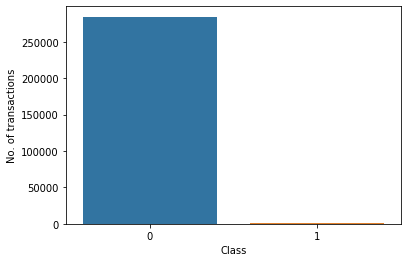

In [6]:
# Data Unbalance with respect to target : Class

print('No.of total transactions: {}'.format(df.shape[0]))
print('Number of NOT FRAUD transactions: {}'.format(df[df.Class==0].shape[0]))
print('Nubmer of FRAUD transactions: {}'.format(df[df.Class==1].shape[0])) 

ax = sns.countplot(df['Class'],label="Class")
plt.ylabel('No. of transactions');
plt.xlabel('Class');

The <b> Target ('Class')</b> is unbalance as no. of <b>NOT FRAUD transactions</b> are far more than <b>FRAUD transactions (492 or 0.172%)</b>, thus our model can be bit biased because of data imbalance

<h3> Data Exploration </h3>

Here we will explore the data in different ways to understand their correlation with target (CLass: 0 1):

  1. Transactions Done in Time [distplot()]
  2. Transactions Amount [boxplot(), scatter()]
  3. Features Correlation [heatmap(),lmplot()]
  4. Features Density Plot [kdeplot()]
  5. Violin, Joint Plots

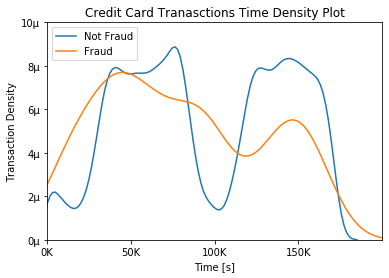

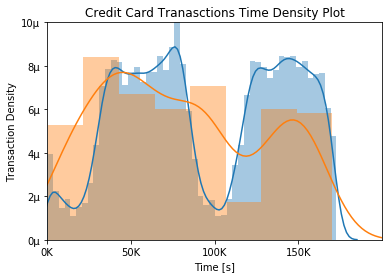

In [7]:
# Transaction Done in Time:

transactions_notfraud = df['Class'] == 0
transactions_fraud = df['Class'] == 1

class_0 = df.loc[transactions_notfraud]['Time']
class_1 = df.loc[transactions_fraud]['Time']

group_labels=['Not Fraud', 'Fraud']

plt.figure()
g1=sns.distplot(class_0,hist=False,label=group_labels[0]);
g2=sns.distplot(class_1,hist=False,label=group_labels[1]);

plt.xticks(np.arange(0, 200e3, step=50e3));# Set x label locations.
plt.yticks(np.arange(0, 10e-6, step=2e-6));# Set y label locations.

xlabels =(['{:,.0f}'.format(x) + 'K' for x in g1.get_xticks()/1000]) #Label format in x
ylabels =(['{:,.0f}'.format(y) + '\u03BC' for y in g1.get_yticks()*1e6]) #Label format in y
g1.set_xticklabels(xlabels)
g1.set_yticklabels(ylabels)

plt.xlim(0,200e3);
plt.ylim(0,10e-6);

plt.ylabel('Transaction Density');
plt.xlabel('Time [s]');
plt.title('Credit Card Tranasctions Time Density Plot')

#------------------------------------------------------------------------------------#

group_labels=['Not Fraud', 'Fraud']
plt.figure()
g1=sns.distplot(class_0,hist=True,label=group_labels[0]);
g2=sns.distplot(class_1,hist=True,label=group_labels[1]);

plt.xticks(np.arange(0, 200e3, step=50e3));# Set x label locations.
plt.yticks(np.arange(0, 10e-6, step=2e-6));# Set y label locations.

xlabels =(['{:,.0f}'.format(x) + 'K' for x in g1.get_xticks()/1000]) #Label format in x
ylabels =(['{:,.0f}'.format(y) + '\u03BC' for y in g1.get_yticks()*1e6]) #Label format in y
g1.set_xticklabels(xlabels)
g1.set_yticklabels(ylabels)

plt.xlim(0,200e3);
plt.ylim(0,10e-6);

plt.ylabel('Transaction Density');
plt.xlabel('Time [s]');
plt.title('Credit Card Tranasctions Time Density Plot');

<b> Transactions done in time </b> shows that <b> Fraud transactions </b> are done better distributed (equally in time) even during the night time.

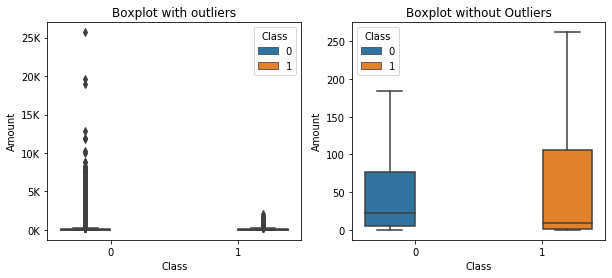

In [8]:
# Transaction amount
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

s1=sns.boxplot(ax=ax1,x='Class',y='Amount',hue='Class',data=df,showfliers=True)
s2=sns.boxplot(ax=ax2,x='Class',y='Amount',hue='Class',data=df,showfliers=False)

ylabels =(['{:,.0f}'.format(y) + 'K' for y in s1.get_yticks()/1000]); #Label format in y
s1.set_yticklabels(ylabels);

ax1.set_title('Boxplot with outliers');
ax2.set_title('Boxplot without Outliers');

In [9]:
class_A0 = df.loc[transactions_notfraud]['Amount']
class_A1 = df.loc[transactions_fraud]['Amount']


print('Not Fraud Transactions - Stats')
print('---------------------------------')
print(class_A0.describe())
print('\n')
print('Fraud Transactions - Stats')
print('--------------------------------')
print(class_A1.describe())

Not Fraud Transactions - Stats
---------------------------------
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Fraud Transactions - Stats
--------------------------------
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Parameters      | Not Fraud transactions (Real ones) | Fraud transactions (Not Real ones)
----------------|:----------------------------------:|:-----------:
mean, Q1 (25%)  |Larger                              | Smaller 
Q3,Q4 (75%, std)|Smaller                             | Larger 
Outliers        |Larger                              | Smaller 


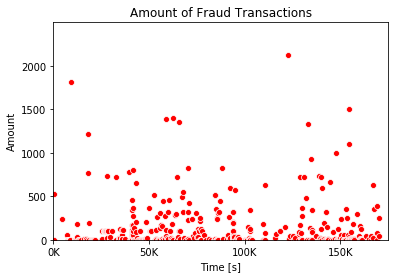

In [10]:
#Amount of Fraud Transactions
fraud=df.loc[df['Class']==1]

x=fraud['Time']
y=fraud['Amount']

sc=sns.scatterplot(x=x,y=y,color='red');

plt.xticks(np.arange(0, 175e3, step=50e3));# Set x label locations.
plt.yticks(np.arange(0, 2500, step=500));# Set y label locations.

xlabels =(['{:,.0f}'.format(x) + 'K' for x in sc.get_xticks()/1000]) #Label format in x
sc.set_xticklabels(xlabels)

plt.xlim(0,175e3);
plt.ylim(0,2500);

plt.ylabel('Amount');
plt.xlabel('Time [s]');
plt.title('Amount of Fraud Transactions');

More fraud transactions are done below 500$ and high value amount are done basically in the evening and night time

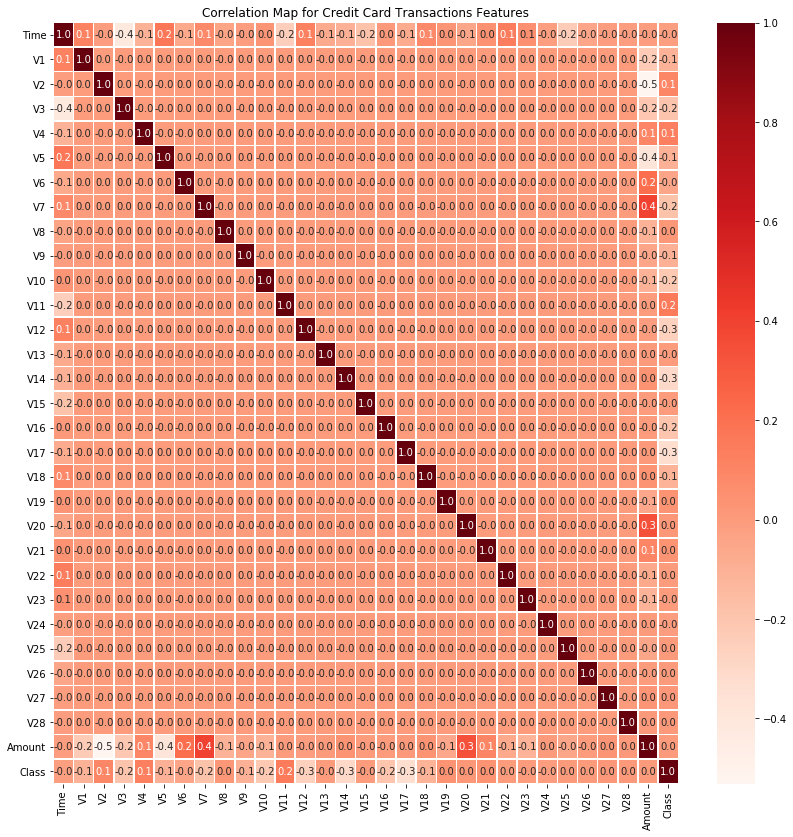

In [11]:
#Features Correlation

f,ax = plt.subplots(figsize=(14, 14))
ax.set_title('Correlation Map for Credit Card Transactions Features')
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="Reds");

As all other data except Time and Amount has been explored and been implemented by PCA. Also, no high positive/negative correlation exists between features <b>V1-V28</b> and Time & Amount. here is the summary:

Paramater | Positive corr | Negative corr
----------|:-------------:|:-------------:
Time      |               | V3 
Amount    |V7,V20         | V2,V5


<b> Positive Slope = positive correlation </b>

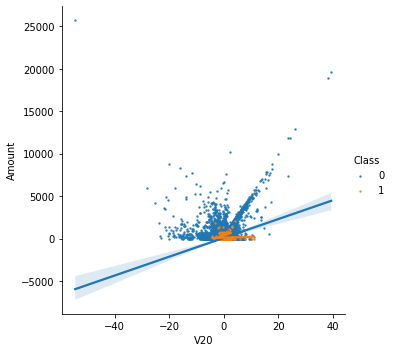

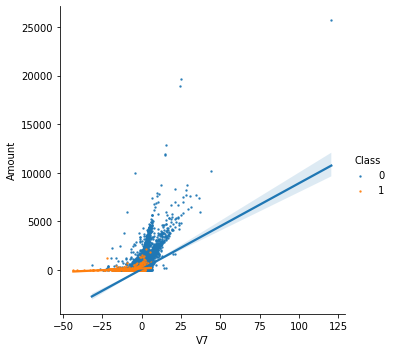

In [12]:
# Plot data and regression model fits across a FacetGrid using lmplot()

lm1=sns.lmplot(x='V20',y='Amount',data=df,hue='Class',fit_reg=True,scatter_kws={'s':2})
lm2=sns.lmplot(x='V7',y='Amount',data=df,hue='Class',fit_reg=True,scatter_kws={'s':2})


<b> Negative slope = Negative correlation </b>

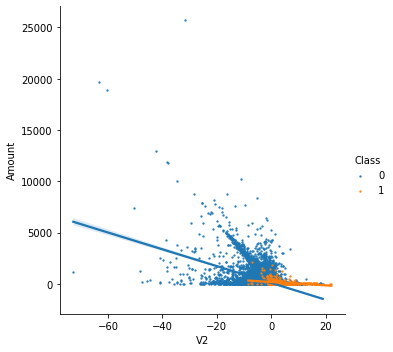

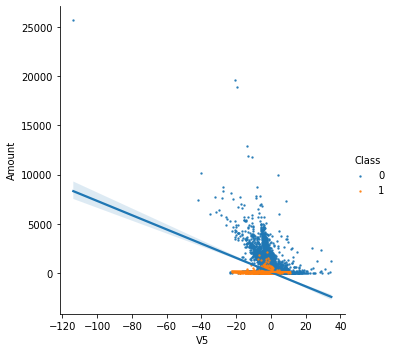

In [13]:
# Plot data and regression model fits across a FacetGrid using lmplot()

lm1=sns.lmplot(x='V2',y='Amount',data=df,hue='Class',fit_reg=True,scatter_kws={'s':2})
lm2=sns.lmplot(x='V5',y='Amount',data=df,hue='Class',fit_reg=True,scatter_kws={'s':2})


C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



<Figure size 432x288 with 0 Axes>

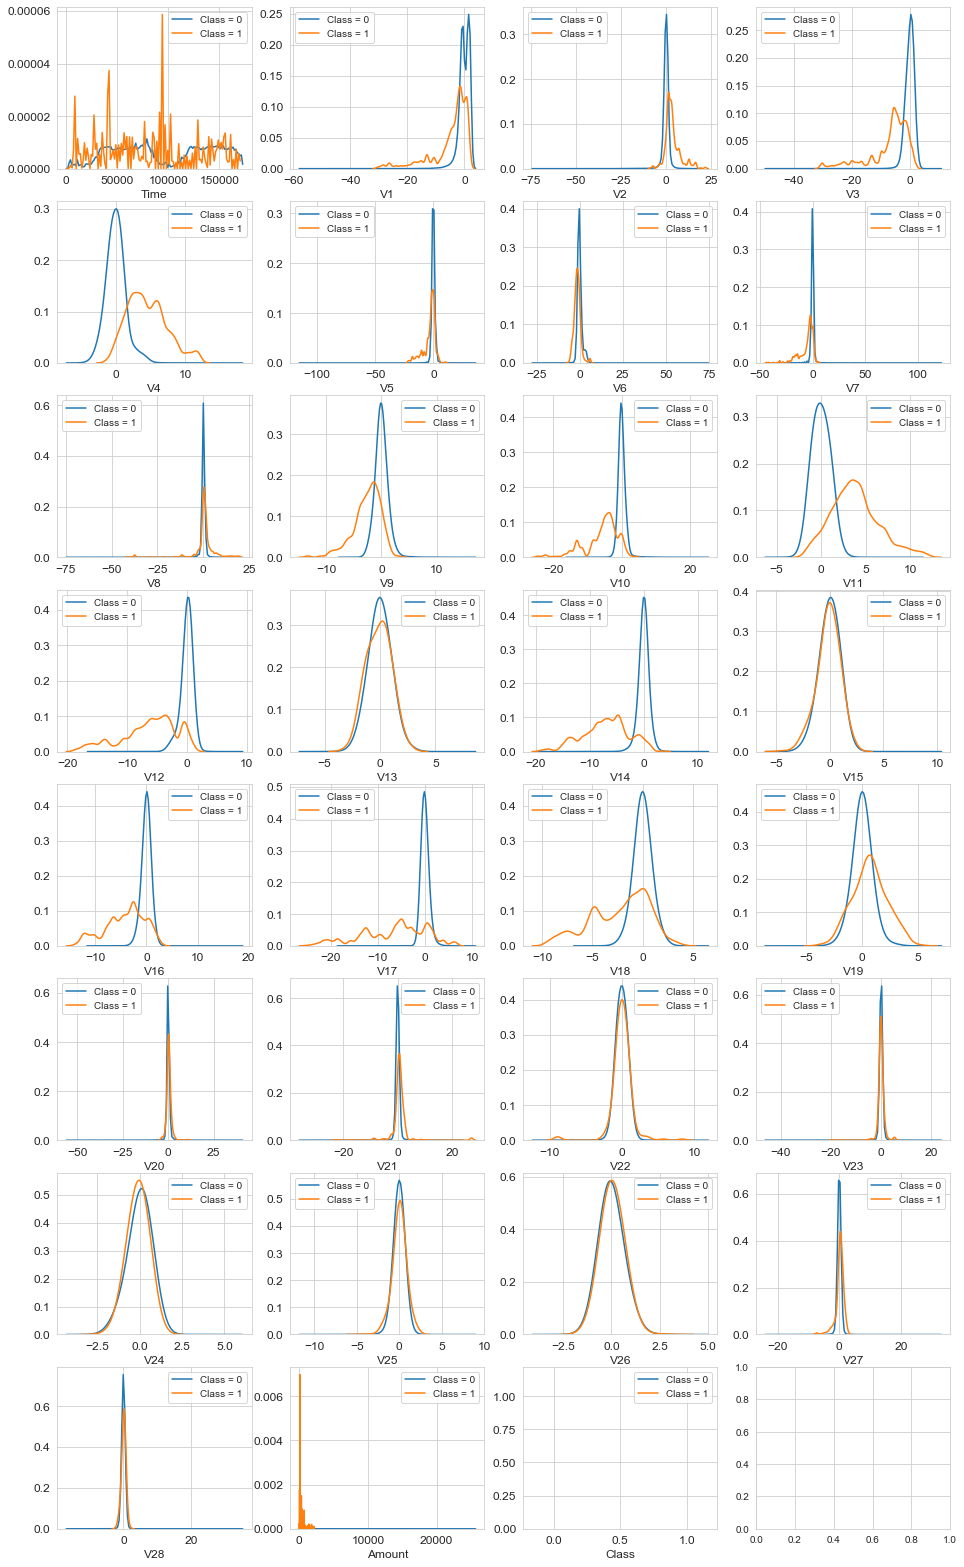

In [14]:
# Features Density Plot [kdeplot()]

var = df.columns.values

i = 0;
t0 = df.loc[df['Class'] == 0];
t1 = df.loc[df['Class'] == 1];

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

<b> Feature and Target </b>

In [15]:
y = df.Class                          
drop_cols = ['Class']
x = df.drop(drop_cols,axis = 1 )
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


<b> Violin Plots </b> for split category of 3  x 10 features

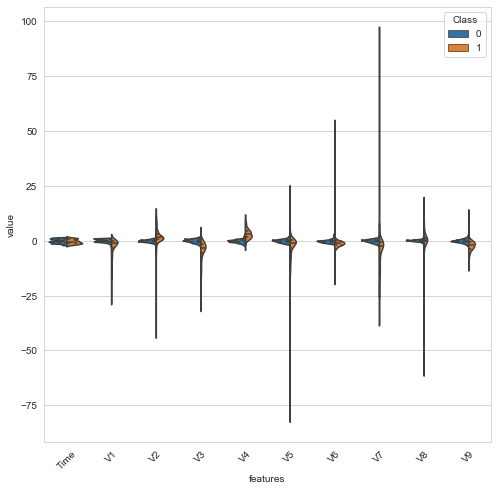

In [16]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(8,8))
sns.violinplot(x="features", y="value", hue="Class", data=data,split=True, inner="quart")
plt.xticks(rotation=45);

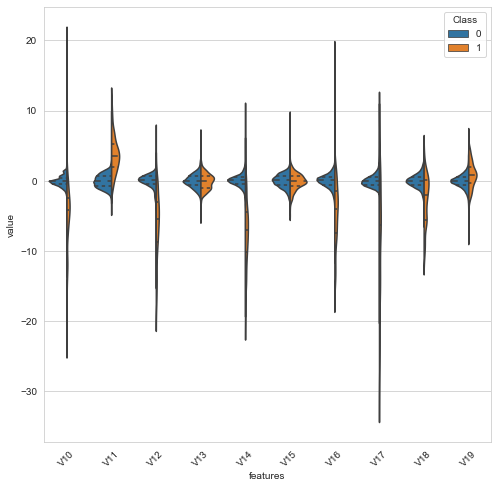

In [17]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="Class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(8,8))
sns.violinplot(x="features", y="value", hue="Class", data=data,split=True, inner="quart")
plt.xticks(rotation=45);

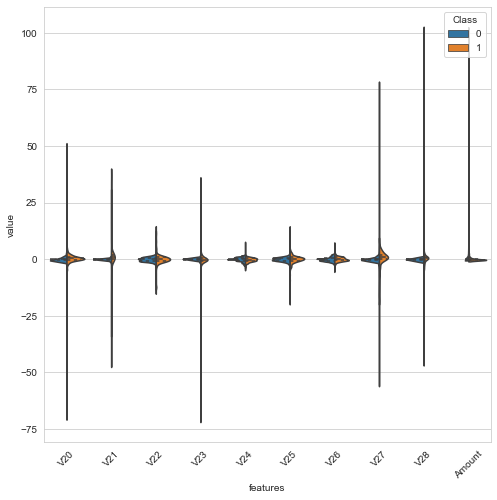

In [18]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              
data = pd.concat([y,data_n_2.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="Class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(8,8))
sns.violinplot(x="features", y="value", hue="Class", data=data,split=True, inner="quart")
plt.xticks(rotation=45);

<b> Joint Plots </b> between V20 and Amount

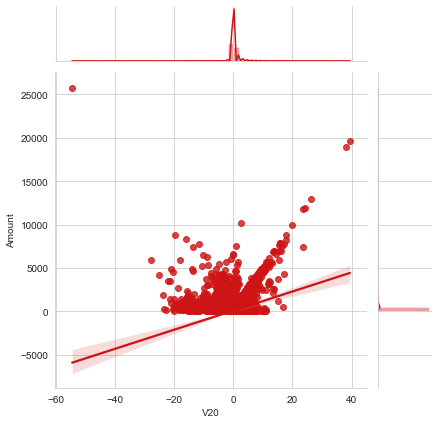

In [19]:
sns.jointplot(x.loc[:,'V20'],
              x.loc[:,'Amount'],
              kind="regg",
              color="#ce1414");

<h3> Prediction Models </h3>

Here we will explore predictive models (algorithms) to compare their predicted accuracy (Feature Importance, Area Under Curve (AUC), Confusion Matrix). The models are built using following techniques:

<b>Advanced Technique:</b>

  1. RandomForestClassifier
  2. AdaBoostClassifier
  3. CatBoostClassifier
  4. XGBoost
  5. LightGBM

In [28]:
target = 'Class'
features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [29]:
# Split data into train and test data
train_df,test_df=train_test_split(df,test_size=0.3,random_state=42)
# Split train data into validation data
train_df,valid_df=train_test_split(train_df,test_size=0.3,random_state=42)

In [ ]:
# Define function for classifier, feature importance, Confusion matrix, AUC

In [35]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
clf.fit(train_df[features],train_df[target].values)
preds=clf.predict(valid_df[features])

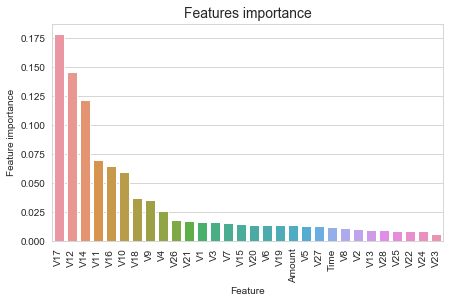

In [36]:
tmp = pd.DataFrame({'Feature': features, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

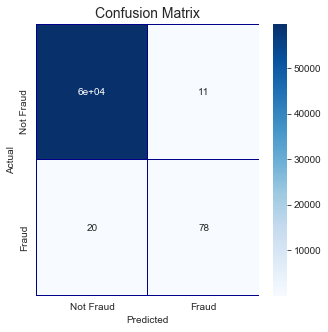

In [37]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [38]:
roc_auc_score(valid_df[target].values, preds)

0.8978670748846161

In [40]:
from sklearn import metrics
print('Accuracy for testing data is: ',metrics.accuracy_score(valid_df[target].values,preds))

Accuracy for testing data is:  0.999481692024745
